<a href="https://colab.research.google.com/github/Vaibhavidhankhar/CodeAlpha_Iris-Flower-Classification/blob/main/PROJECT_IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===============================
# 🌸 Iris Flower Classification
# ===============================

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iriscsv


In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
!pip install opendatasets

In [ ]:
od.download("https://www.kaggle.com/datasets/saurabh00007/iriscsv?select=Iris.csv")

Skipping, found downloaded files in "./iriscsv" (use force=True to force download)


In [ ]:
pd.read_csv("/content/iriscsv/Iris.csv")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# ===============================
# 1️⃣ Load Iris dataset
# ===============================
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df['Species_name'] = df['Species'].apply(lambda x: iris.target_names[x])

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
print(df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species', 'Species_name'],
      dtype='object')


In [ ]:
# Drop the 'Id' column if exists
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Separate features and target
X = df.drop(columns=['Species_name'])  # use the correct column name
y = df['Species_name']

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species', 'Species_name'],
      dtype='object')


In [ ]:
# ✅ Select numeric features and target
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['Species']  # categorical target

# ✅ Encode target labels to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# ✅ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Train a simple SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# ✅ Evaluate model
y_pred = svm_model.predict(X_test_scaled)

# Convert numeric labels back to original species names
y_test_names = le.inverse_transform(y_test)
y_pred_names = le.inverse_transform(y_pred)

print(classification_report(y_test_names, y_pred_names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



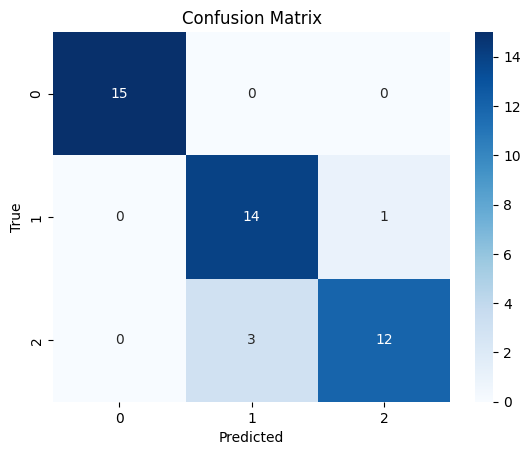

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Convert numeric labels back to original species names
y_test_names = le.inverse_transform(y_test)
y_pred_names = le.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test_names, y_pred_names))

# Confusion matrix
cm = confusion_matrix(y_test_names, y_pred_names)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


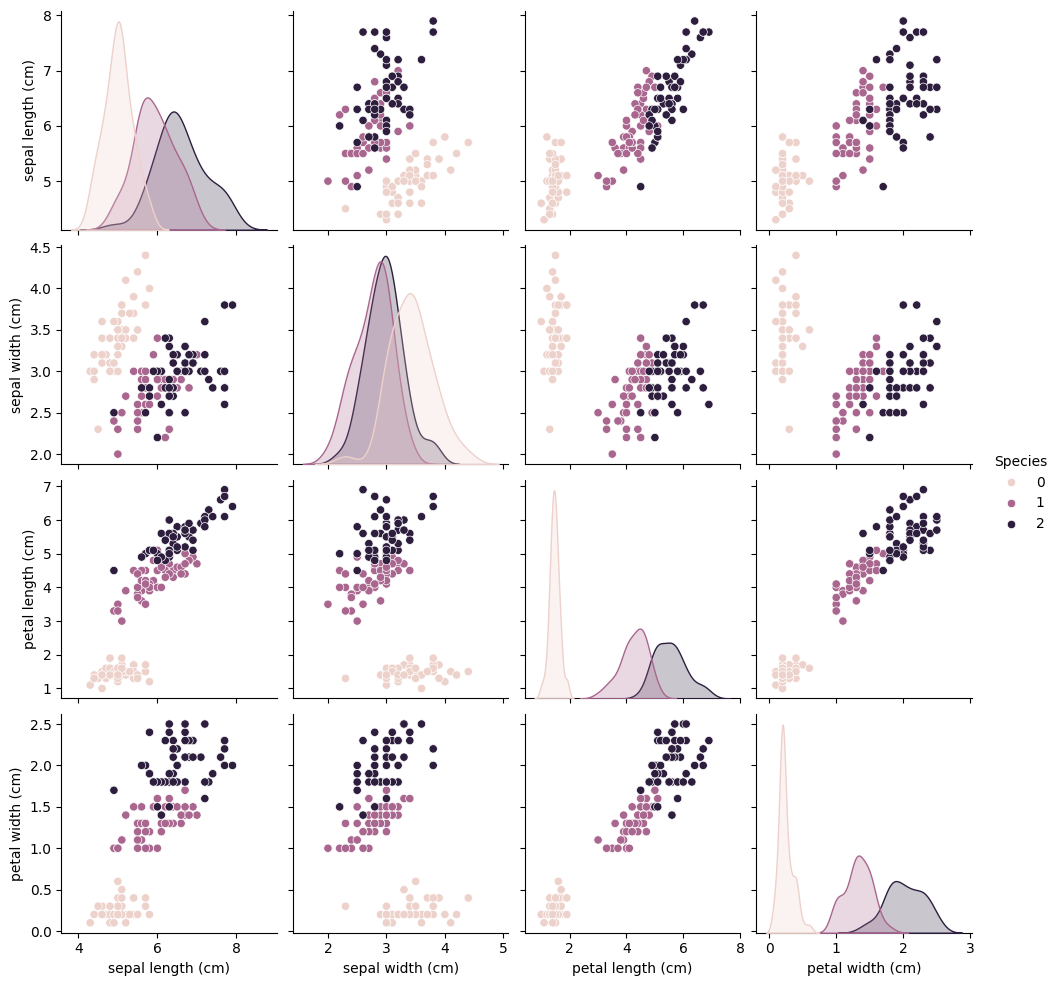

In [ ]:
sns.pairplot(df, hue='Species')
plt.show()


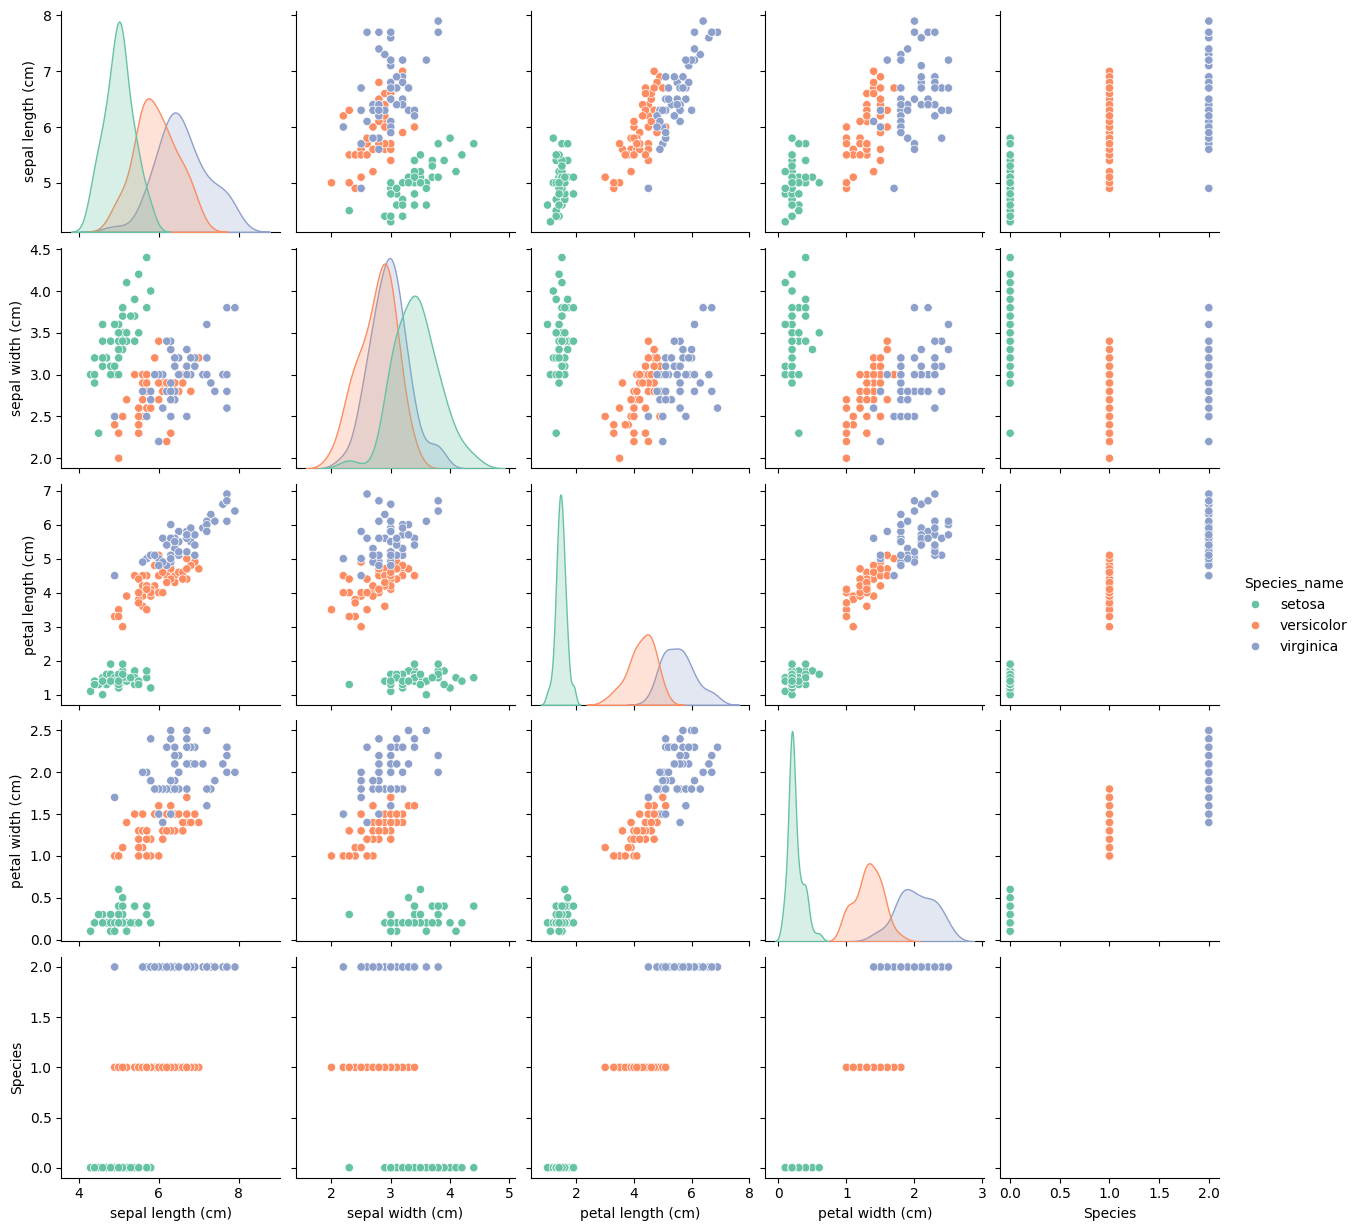

In [ ]:
# ===============================
# 2️⃣ Exploratory Data Analysis
# ===============================
sns.pairplot(df, hue='Species_name', palette='Set2')
plt.show()

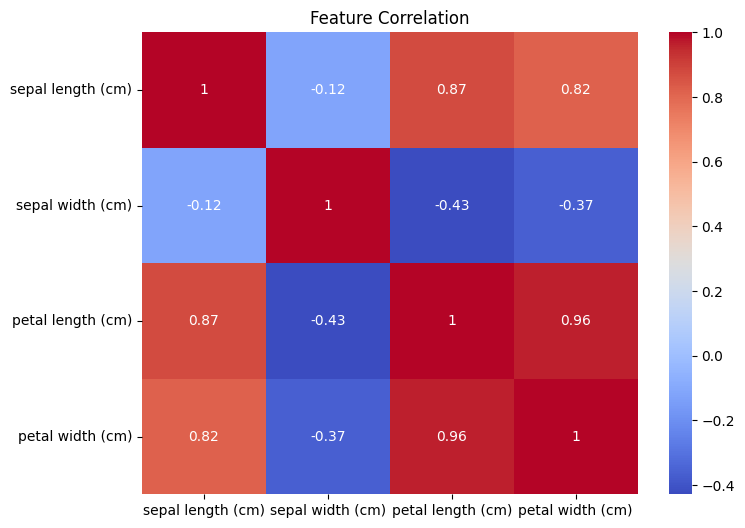

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
# ===============================
# 3️⃣ Preprocessing
# ===============================
# Features and target
X = df[iris.feature_names]
y = df['Species_name']  # integer encoded target


In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ===============================
# 4️⃣ Train SVM Model
# ===============================
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [ ]:
# Predict
y_pred_svm = svm_model.predict(X_test_scaled)


In [ ]:
# Evaluation
print("✅ SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))


✅ SVM Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



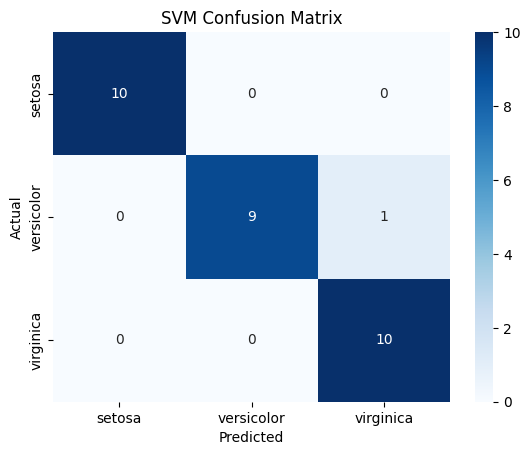

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
# ===============================
# 5️⃣ Train Random Forest Model
# ===============================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

✅ Random Forest Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



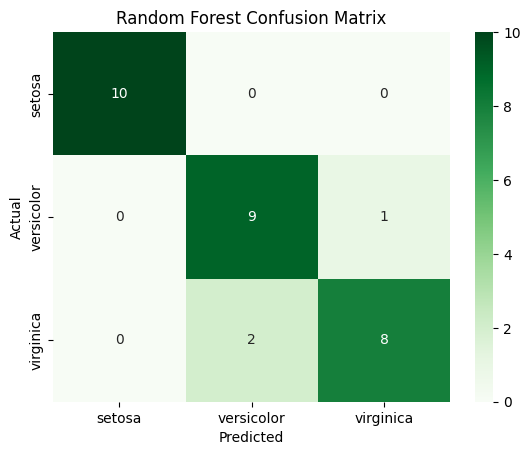

In [ ]:
print("✅ Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
# ===============================
# 6️⃣ Optional: Quick Hyperparameter Tuning (SVM)
# ===============================
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
best_svm = grid.best_estimator_
print("🎯 Best SVM Hyperparameters:", grid.best_params_)


🎯 Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Evaluate tuned model
y_pred_best = best_svm.predict(X_test_scaled)
print("\n✅ Tuned SVM Classification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))


✅ Tuned SVM Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# ===============================
# 7️⃣ Inference Example
# ===============================
inference_text = """
Inference:
The model can accurately classify Iris flowers into Setosa, Versicolor, and Virginica
based on their sepal and petal measurements. High accuracy indicates that the features
are well-separated and the classifier generalizes well on unseen data.
"""

print(inference_text)


Inference:
The model can accurately classify Iris flowers into Setosa, Versicolor, and Virginica
based on their sepal and petal measurements. High accuracy indicates that the features
are well-separated and the classifier generalizes well on unseen data.



In [ ]:
# ===============================
# 8️⃣ Conclusion
# ===============================
conclusion_text = """
## Conclusion
This Iris Flower Classification project demonstrates:
- Loading and exploring the Iris dataset
- Visualizing feature relationships
- Training SVM and Random Forest models
- Evaluating model performance
- Performing quick hyperparameter tuning for SVM

The project highlights basic classification concepts and shows how machine learning can
predict categorical outcomes based on numerical features.
"""

print(conclusion_text)


## Conclusion
This Iris Flower Classification project demonstrates:
- Loading and exploring the Iris dataset
- Visualizing feature relationships
- Training SVM and Random Forest models
- Evaluating model performance
- Performing quick hyperparameter tuning for SVM

The project highlights basic classification concepts and shows how machine learning can
predict categorical outcomes based on numerical features.



In [ ]:
svm_model


SVC(C=1, random_state=42)

In [ ]:
import joblib

# Save your trained model
joblib.dump(svm_model, 'iris_model.pkl')




['iris_model.pkl']

In [ ]:
# Save the scaler if you used one
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Original target
y = df['Species_name']  # use your actual column name

# Encode species to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save the label encoder for later
import joblib
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(svm_model, 'iris_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
# Load saved objects
svm_model = joblib.load('iris_model.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')

# Example flower
new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]],
                          columns=X.columns)

# Scale
new_flower_scaled = scaler.transform(new_flower)

# Predict numeric
num_pred = svm_model.predict(new_flower_scaled)

# Convert to species name
species_pred = le.inverse_transform(num_pred)

print("Predicted species:", species_pred[0])


Predicted species: setosa


In [ ]:
# Load saved objects
svm_model = joblib.load('iris_model.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')

# Example flower measurements
new_flower = [[5.8, 2.7, 5.1, 1.9]]

# Scale features
new_flower_scaled = scaler.transform(new_flower)

# Predict numeric label
num_pred = svm_model.predict(new_flower_scaled)

# Convert to species name
species_pred = le.inverse_transform(num_pred)
print("Predicted species:", species_pred[0])


Predicted species: virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
